# Introduction to Programming Artificial Intelligence 

## Class 11 - Keras ANN Regression

### Exercise 1
Import Keras, and any others packages that you will need.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from math import sin as sine

2021-12-13 03:37:37.638301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-13 03:37:37.638327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Exercise 2
Create your training set:
- a. Create 32 values of x between 0 and 1.571
- b. Create your y = cos (x)
- c. You should now have 32 pairs of the form: (x, cos (x))

In [2]:
x = list (range (0, 32))                               # x = { 0 ... 31 }
pi_2 = 3.1415926 / 2                                   # π/2 radians (90 degrees)
alpha = pi_2 / 32                                      # The increment
x_radians = list (map (lambda x: alpha * x, x))        # x_radians = { 0 ... π/2 }
y = list (map (lambda x: sine (x), x_radians))         # y = { sine (x0) ... , sine (x31) }

### Exercise 3 
Normalize your x’s so that they are between 0 and 1.

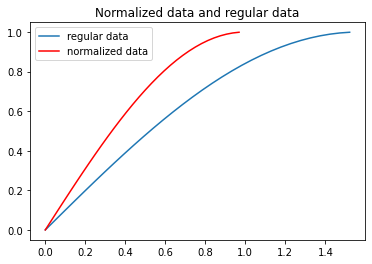

In [3]:
plt.plot (x_radians, y, label = "regular data")             # y = sine (x), the blue curve
xN = list (map (lambda x: x / pi_2, x_radians))             # Normalize, 0 ≤ x ≤ 1
plt.plot (xN, y, c="r", label = "normalized data")          # sine is naturally normalized, red curve
plt.title ("Normalized data and regular data")
plt.legend()
plt.show ()

### Exercise 4 
Create your Keras ANN. For the layers use { 1, 5, 3, 1 }.
- Use the parameters from the lecture unless otherwise specified.

In [4]:
model = Sequential()                                           # Keras container for our model
model.add(Dense(5, input_dim=1, activation='sigmoid'))         # First layer, one input (x), 5 neurons
model.add(Dense(3, activation='sigmoid'))                      # Second layer, 3 neurons
model.add(Dense (1, activation='sigmoid'))                     # One output, y (hopefulle sine (x)!)
model.compile (loss='mean_squared_error', optimizer='adam')    # Build our ANN
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


2021-12-13 03:37:38.991314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-13 03:37:38.991336: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-13 03:37:38.991349: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2021-12-13 03:37:38.991548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exercise 5
Compile and train your ANN.
- a. Use epochs = 3000
- b. Remember the asterisk in the cell label means it is working: “[*]”
It is perfectly normal to take around 1-2 minutes.

In [5]:
# Train our model
h = model.fit (xN, y, verbose = False, epochs=3000)

### Exercise 6
Compare the results to your training data. How did you do?

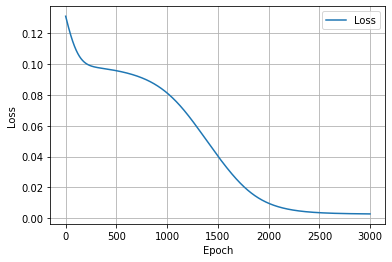

In [6]:
def LossHistory (history):
    plt.plot (history.history['loss'], label='Loss')
    plt.xlabel ('Epoch')
    plt.ylabel ('Loss')
    plt.legend ()
    plt.grid (True)
    plt.show ()
LossHistory (h)

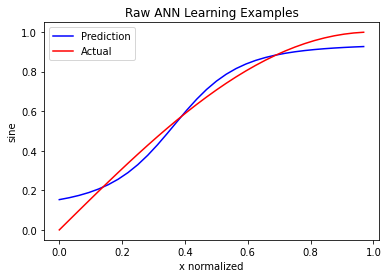

In [7]:
plt.plot (xN, model.predict (xN), c="b", label = "Prediction")
plt.plot (xN, y, c="r", label = "Actual")
plt.xlabel ("x normalized")
plt.ylabel ("sine")
plt.title ("Raw ANN Learning Examples")
plt.legend()
plt.show ()

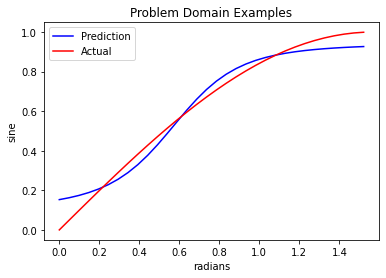

In [8]:
# We're plotting with radians, but we still invoke our ANN with normalized data
plt.plot (x_radians, model.predict (xN), c="b", label = "Prediction")
plt.plot (x_radians, y, c="r", label = "Actual")
plt.xlabel ("radians")
plt.ylabel ("sine")
plt.title ("Problem Domain Examples")
plt.legend()
plt.show()